In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import seaborn as sns

#### Reading dataset

In [2]:
df = pd.read_csv('Elon_musk.csv', encoding='cp1252', error_bad_lines=False)

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)  # deleting unnamed column

In [21]:
lemma = WordNetLemmatizer()
# Loading stop words file
stop_file = open('stop.txt', 'r')
stop_words = stop_file.read().split()
stop_words[0:5]

['a', "a's", 'able', 'about', 'above']

In [6]:
# Function to preprocess each document in the dataset
def text_prep(text):
    """This function will take document/text as an argument and preprocess by removing unwanted characters and 
    do tokenization and lemmatization and give list of lemmatized words for each document/text"""
    corp = str(text).lower() 
    corp = re.sub('[^a-zA-Z]+',' ', corp).strip()
    corp = re.sub(r'#', '', corp)
    corp = re.sub(r'RT[\s]+', '', corp)
    corp = re.sub(r'https?:\/\/\S+', '', corp)
    corp = re.sub(r':', '', corp)
    tokens = word_tokenize(corp)    # tokenization
    words = [t for t in tokens if t not in stop_words]  # stop words removal
    lemmatize = [lemma.lemmatize(w) for w in words]  # lemmatization
    
    return lemmatize

In [7]:
# Preprocessing entire text column
preprocess_tag = [text_prep(i) for i in df['Text']] # preprocessing
df["preprocess_txt"] = preprocess_tag 
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

In [8]:
df.head()

,Text,preprocess_txt,total_len
0,@kunalb11 I’m an alien,"[kunalb, alien]",2
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...",8
2,@joerogan @Spotify Great interview!,"[joerogan, spotify, great, interview]",4
3,@gtera27 Doge is underestimated,"[gtera, doge, underestimated]",3
4,@teslacn Congratulations Tesla China for amazi...,"[teslacn, congratulation, tesla, china, amazin...",7


#### Sentiment Analysis

In [19]:
# Loading negative words text file
neg_file = open('negative-words.txt', 'r')
neg_words = neg_file.read().split()
neg_words[0:5]

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']

In [20]:
# Loading positive words text file
pos_file = open('positive-words.txt', 'r')
pos_words = pos_file.read().split()
pos_words[0:5]

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [13]:
# Calculating number of positive words in the document
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos

In [14]:
# Calculating number of negative words in the document
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

In [15]:
# Calculating Sentiment based on number of positive and negative words occurences
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

In [16]:
df

,Text,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,@kunalb11 I’m an alien,"[kunalb, alien]",2,0,0,0.00
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[id, aa, carmack, ray, tracing, cyberpunk, hdr...",8,0,0,0.00
2,@joerogan @Spotify Great interview!,"[joerogan, spotify, great, interview]",4,1,0,0.25
3,@gtera27 Doge is underestimated,"[gtera, doge, underestimated]",3,0,0,0.00
4,@teslacn Congratulations Tesla China for amazi...,"[teslacn, congratulation, tesla, china, amazin...",7,2,0,0.29
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...","[flcnhvy, true, sound, surreal, negative, prop...",12,2,2,0.00
1995,@PPathole Make sure to read ur terms &amp; con...,"[ppathole, make, read, ur, term, amp, conditio...",9,0,0,0.00
1996,@TeslaGong @PPathole Samwise Gamgee,"[teslagong, ppathole, samwise, gamgee]",4,0,0,0.00
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,"[ppathole, altho, dumb, dumber]",4,0,1,-0.25


#### Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

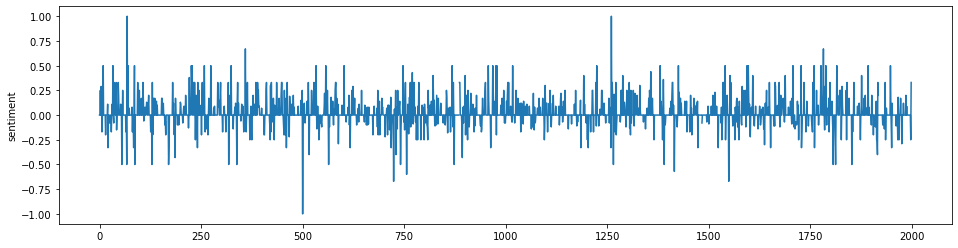

In [17]:
plt.figure(figsize=(16, 4))
sns.lineplot(y= 'sentiment', x=df.index, data= df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

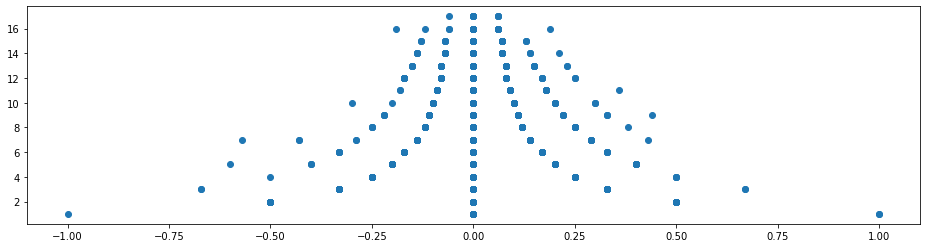

In [18]:
plt.figure(figsize=(16, 4))
plt.scatter(df['sentiment'], df['total_len'])
plt.show()